In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from matplotlib import pyplot as plt
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=14)
plt.figure(figsize=(10,10))

from warnings import simplefilter
simplefilter("ignore", FutureWarning)
%matplotlib inline

Importo las librerías necesarias

In [2]:
dataSet = pd.read_csv("./data/orders.csv", sep=',', index_col=False, decimal='.')

Importo el csv con pandas a una variable

In [3]:
dataSet.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


Mostramos las primeras 10 filas

In [4]:
print(dataSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None


Podemos comprobar que hemos generado un DataFrame de Pandas, cuantas variables, datos y tipo de datos tiene

In [5]:
dataSet.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


Mostramos los estudios estadísticos del dataFrame, agrupados por variables. Aquí ya vemos algunos datos interesantes.

La mayor cantidad de clientes compra entre la 10:00h y la 16:00h. aprox, y la mayor cantidad de compras se aglutina en una franja de 4h, aprox.

Por lo tanto, las compras más relevantes se realizan entre las 11:00h y las 15:00h aprox. siendo el pico a las 13:00h.

En cuanto a repetir compras, la gente tarda entre 1,5 y 7 días. La mayoría no tarda más de 9 días en repetir desde el pedido anterior.


In [6]:
dataSet = dataSet.dropna()
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 1 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 196.2+ MB


Quitamos filas con nulos. La cantidad eliminada es de unas 200 mil filas, que representa un 6% aprox de las originales, por lo que es una cantidad de datos eliminada no crítica.

Después de ver los tipos de datos disponibles, vamos a analizar a los usuarios, por su hora de compra y última día de compra desde su última vez. Creo que para un análisis rápido, según lo visto con la clase describe, es lo más óptimo.

In [7]:
dataSetHour = dataSet[['order_hour_of_day']]
dataSetHour.head()

,order_hour_of_day
1,7
2,12
3,7
4,15
5,7


In [8]:
dataSetDay = dataSet[['days_since_prior_order']]
dataSetDay.head()

,days_since_prior_order
1,15.0
2,21.0
3,29.0
4,28.0
5,19.0


Como no queremos analizar el comportamiento de cada usuario, analizamos el total de compras frente al orden del día de compra y el día desde el pedido anterior.

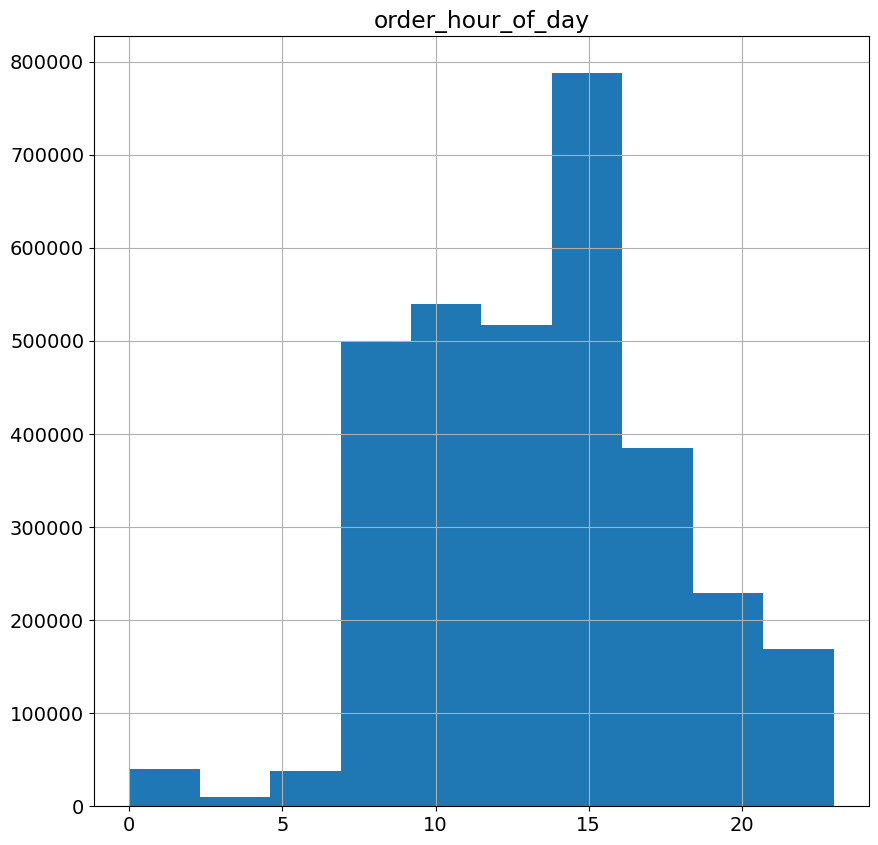

In [9]:
fig_hist_Hour = dataSetHour.hist()

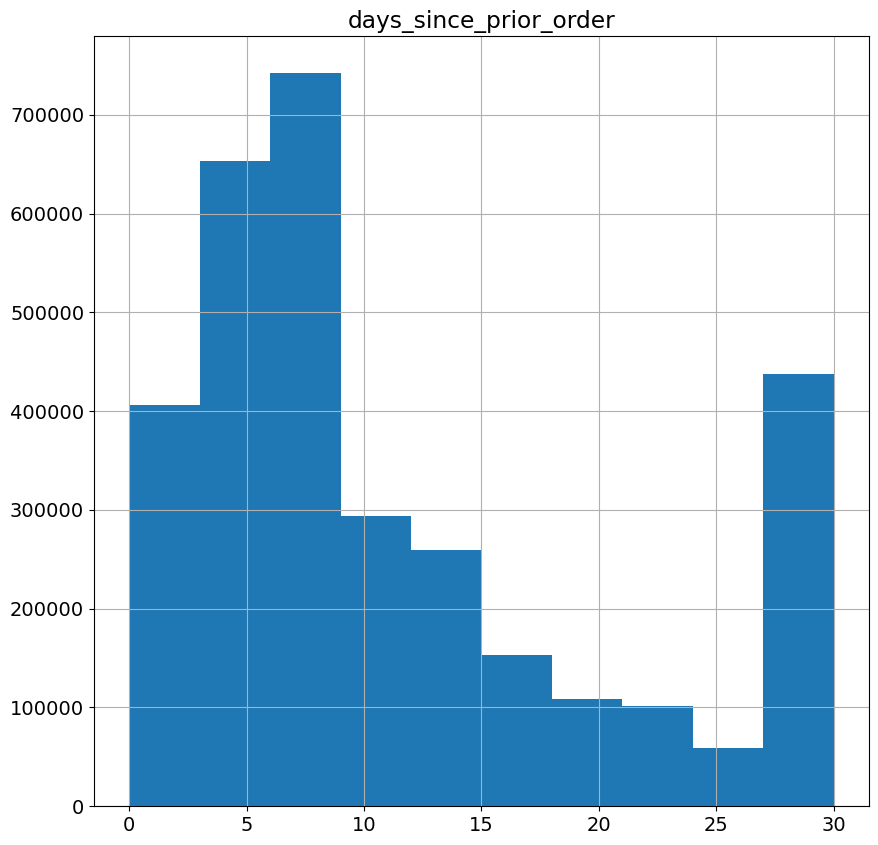

In [10]:
fig_hist_Day = dataSetDay.hist()

<AxesSubplot:ylabel='Density'>

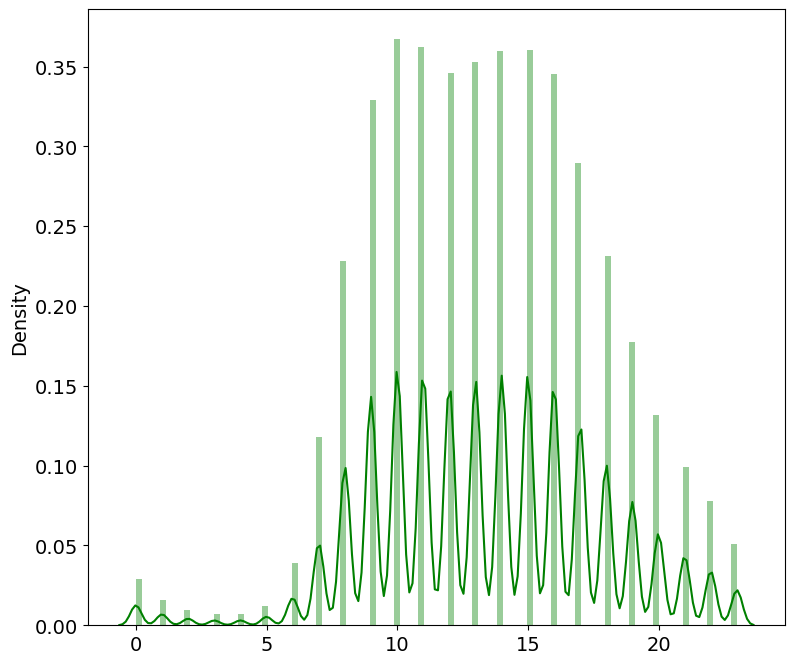

In [11]:
plt.figure(figsize=(9,8))
sns.distplot(dataSetHour, color='g', bins=100, hist_kws={'alpha':0.4})

<AxesSubplot:ylabel='Density'>

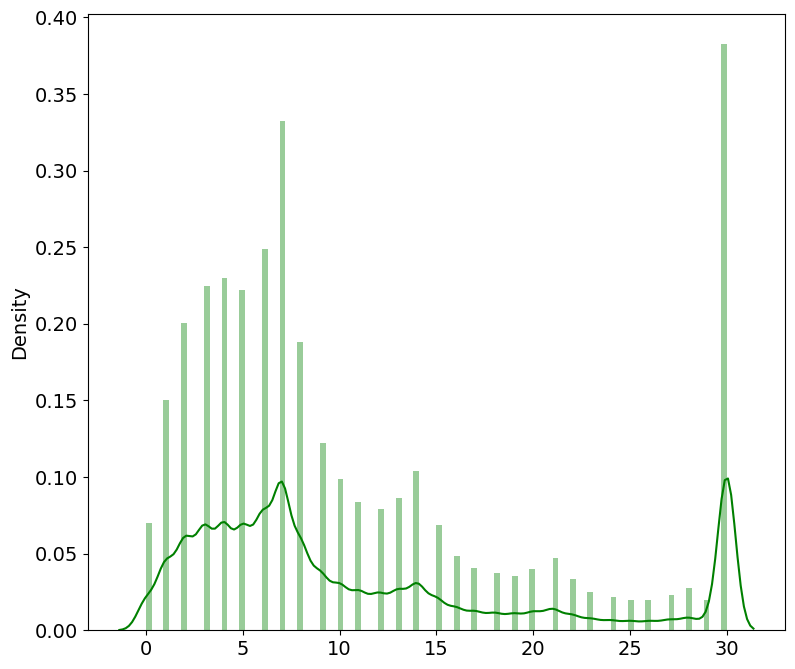

In [12]:
plt.figure(figsize=(9,8))
sns.distplot(dataSetDay, color='g', bins=100, hist_kws={'alpha':0.4})

Como hemos visto gráficamente, corroboramos los análisis realizados de la información que hemos extraído en bruto del dataset.

CONCLUSIONES:
    
    Está claro que la gente compra sobre todo durante el horario laboral, porque es cuando está más activo frente a un ordenador.
    Por lo tanto reforzaría a esas horas, por una parte, la plantilla y los recursos informáticos necesarios para que la gente no se quede tirada por una caída de la web, y que tenga una buena atención al cliente, tanto vía correo, teléfono etc.
    Por otra parte, reforzaría la publicidad online en esa franja. Está claro que el intentar vender más en otros horarios es inútil. Debemos intentar vender más en esos horarios, quitando cuota de mercado a otros competidores.
    
    En cuanto a la repetición en las compras, tenemos un pico muy alto en 30 días. Aquí podemos entender que la gente compra cuando cobra su sueldo, y por eso hace compras de 30 en 30 días. También explica que muy poca gente repita compra cuando han pasado más de 15 días desde su última compra. Sea cuando sea, está más lejos de cuando cobró la nómina.
    Aquí lo interesante sería aumentar la frecuencia de compra. Es decir, que más gente comprara cada menos días. Un objetivo podría ser desplazar los datos desde el día 15, 5 días a la izquierda. Así, por ejemplo, que el pico que tenemos en 30 días pasara a 25, y que la gente que no repite, repitiese, aunque fuese cada 30 días.
    Se podrían probar varias técnicas de máketing. Si viésemos qué público está en la franja derecha, se podrían hacer ofertas especiales, con campañas agresivas online. De todas formas, aquí se debería analizar muy bien qué productos se venden con más frecuencia, cuáles con menos, qué días... y planificar estratégias A/B, a ver cuál resulta mejor.